In [1]:
# Statistical Hypothesis Testing:
# Need to create hypothesis and test our assertions

# Example:
# This is a fair coin
# Data scientists prefer Ptython to R
# Null Hypothesis H0: default position
# H1: Alternate hypothesis to compare H0 to

# 1. fLIPPING A COIN
# a COIN AND WANT TO TEST IF ITS FAIR
# H0: Assumption that the coin has a prob p of landing heads
# Null Hypothesis - The coin is fair so p = 0.5
# H1: Alternate Hypothesis: p != 0.5

# We will test flipping the coin N times and counting the number of heads X
# Each coin flip is a Bernoulli trial
# so X is a Binomail(n,p) random variable we can approx using the normal distribution:

def normal_approx_to_binomail(n, p):
    
    """Finds mu and sigma corresponding to a Binomail(n,p)"""
    # Mean = probability * N (number of trials) = 0.5 * n
    mu = p * n
    # Standard Dev = sqrt of prob (Null H0) * (1-PROB) (H1:Alt Hypo) * N
    # sqrt(0.5 * (1-0.5) * n)
    sigma = math.sqrt(p * (1-p)*n)
    return mu, sigma
    

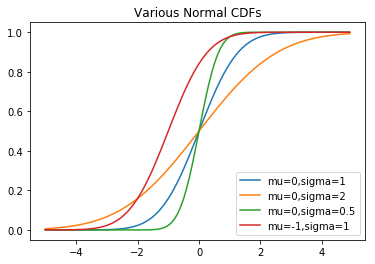

In [2]:
# Whenever a random variable follows a normal distribution we can use
# normal_cdf to figure out the probability that its realized value lies within or outside a particular interval:
import math
from matplotlib import pyplot as plt

# cdf: cumulative distribution function: represents the probability the variable is below a threshold:
# x: input point
# mu: MEAN
# sigma: standard deviation
def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x-mu) / math.sqrt(2) / sigma)) / 2
    
    
# Plot soem example points of normal_cdf:
# Get example points:
xs = [x/10.0 for x in range(-50, 50)]
# Plot points run through normal_cdf:
plt.plot( xs, [normal_cdf(x, sigma=1) for x in xs], '-', label='mu=0,sigma=1' )
plt.plot( xs, [normal_cdf(x, sigma=2) for x in xs], '-', label='mu=0,sigma=2' )
plt.plot( xs, [normal_cdf(x, sigma=0.5) for x in xs], '-', label='mu=0,sigma=0.5' )
plt.plot( xs, [normal_cdf(x, mu=-1) for x in xs], '-', label='mu=-1,sigma=1' )
plt.legend(loc=4) # bottom right
plt.title("Various Normal CDFs")
plt.show()

# The normal_cdf is the probability the variable is below a threshold:
normal_probability_below = normal_cdf

# Check if its above the threhold
def normal_probability_above(lo, mu=0, sigma=1):
    return 1 - normal_cdf(lo, mu, sigma)

# Check if its between: less than hi, but not less than lo
def normal_probability_between(lo, hi, mu=0, sigma=1):
    # Range: High - Low
    return normal_cdf(hi, mu, sigma) - normal_cdf(lo, mu, sigma)

# outside:  not between
def normal_probability_outside(lo, hi, mu=0, sigma=1):
    return 1 - normal_probability_between(lo, hi, mu, sigma)